# Problem

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy.cluster.hierarchy import linkage ,dendrogram,fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler 
import warnings
warnings.filterwarnings('ignore')

# Read the Data

In [184]:
insurance_df = pd.read_csv('insurance_part2_data-2.csv')

In [185]:
insurance_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [186]:
insurance_df.shape

(3000, 10)

In [187]:
insurance_df.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


In [188]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [189]:
insurance_df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [190]:
insurance_df.dtypes

Age               int64
Agency_Code      object
Type             object
Claimed          object
Commision       float64
Channel          object
Duration          int64
Sales           float64
Product Name     object
Destination      object
dtype: object

In [191]:
insurance_df.duplicated().sum()

139

In [192]:
insurance_df.drop_duplicates(inplace = True)

In [193]:
insurance_df.shape

(2861, 10)

In [194]:
df_cat = insurance_df.select_dtypes(include = ['object'])
df_num = insurance_df.select_dtypes(include = ['int64','float64'])

# Categorical variable Analysis

In [195]:
df_cat.head()

,Agency_Code,Type,Claimed,Channel,Product Name,Destination
0,C2B,Airlines,No,Online,Customised Plan,ASIA
1,EPX,Travel Agency,No,Online,Customised Plan,ASIA
2,CWT,Travel Agency,No,Online,Customised Plan,Americas
3,EPX,Travel Agency,No,Online,Cancellation Plan,ASIA
4,JZI,Airlines,No,Online,Bronze Plan,ASIA


<AxesSubplot:xlabel='Agency_Code', ylabel='count'>

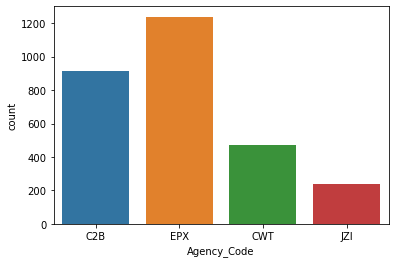

In [196]:
sns.countplot(df_cat['Agency_Code'])

<AxesSubplot:xlabel='Agency_Code', ylabel='Sales'>

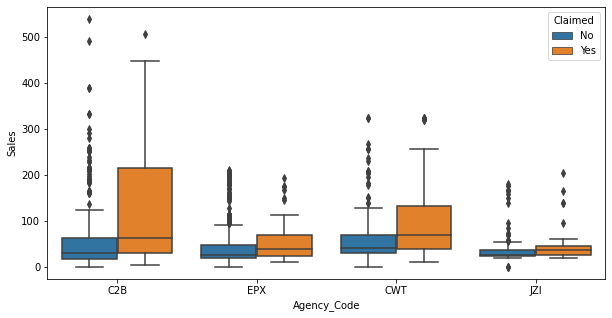

In [197]:
plt.figure(figsize=(10,5))
sns.boxplot(data = insurance_df,x='Agency_Code',y = 'Sales',hue = 'Claimed')

In [198]:
df_cat['Type'].value_counts()

Travel Agency    1709
Airlines         1152
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

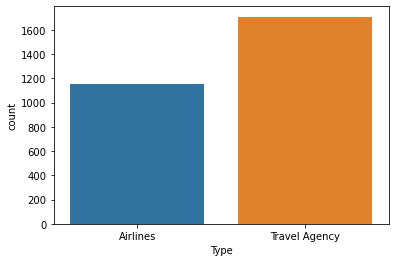

In [199]:
sns.countplot(data = df_cat,x = 'Type')

<AxesSubplot:xlabel='Type', ylabel='Sales'>

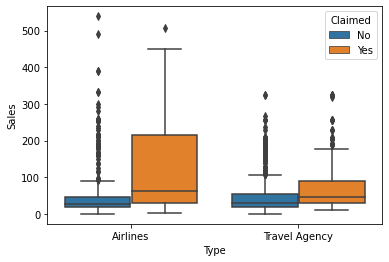

In [200]:
sns.boxplot(data = insurance_df,x ='Type',y = 'Sales',hue = 'Claimed')

<AxesSubplot:xlabel='Channel', ylabel='count'>

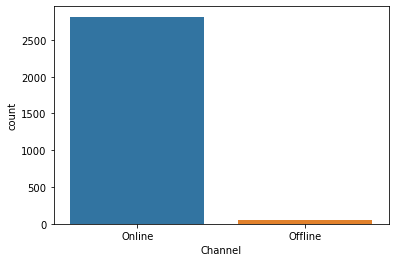

In [201]:
sns.countplot(data = insurance_df,x = 'Channel')

<AxesSubplot:xlabel='Channel', ylabel='Sales'>

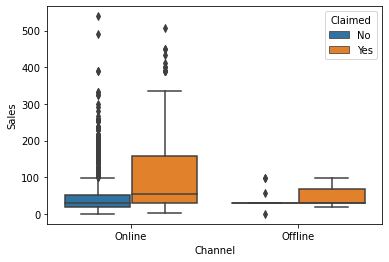

In [202]:
sns.boxplot(data = insurance_df,x = 'Channel',y = 'Sales',hue = 'Claimed')

<AxesSubplot:xlabel='Product Name', ylabel='count'>

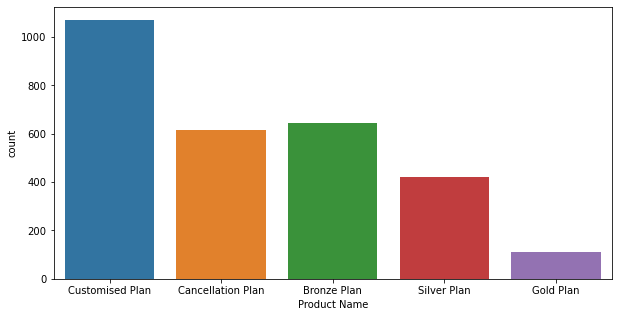

In [203]:
plt.figure(figsize=(10,5))
sns.countplot(data = df_cat,x = 'Product Name')

<AxesSubplot:xlabel='Product Name', ylabel='Sales'>

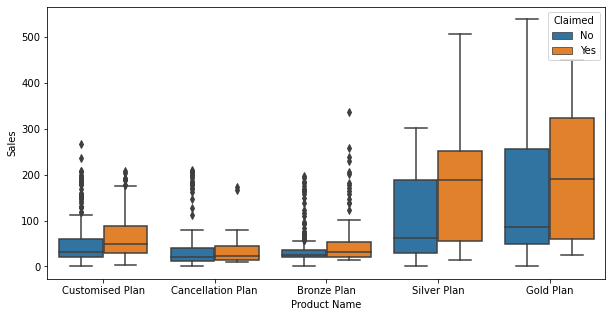

In [204]:
plt.figure(figsize=(10,5))
sns.boxplot(data = insurance_df,x = 'Product Name',y = 'Sales', hue = 'Claimed')

<AxesSubplot:xlabel='Destination', ylabel='count'>

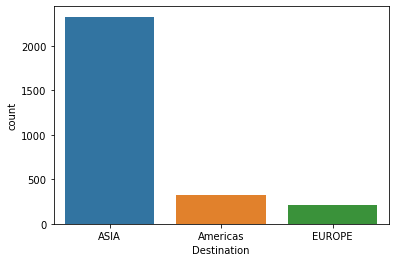

In [205]:
sns.countplot(data = insurance_df,x = 'Destination')

<AxesSubplot:xlabel='Destination', ylabel='Sales'>

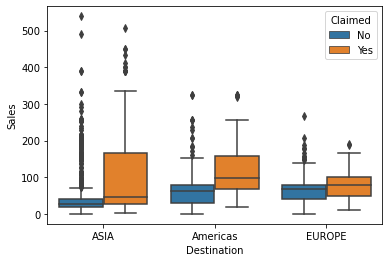

In [206]:
sns.boxplot(data = insurance_df,x = 'Destination',y = 'Sales',hue = 'Claimed')

# Exploratory data analysis

In [207]:
def des(col,nbins):
    print('\n\n value counts of',col)
    print('------------------------------')
    print(insurance_df[col].value_counts(),end = ' ')

In [208]:
lst_cat = df_cat.columns.values
len(lst_cat)

6

In [209]:
for i in lst_cat:
    des(i,20)



 value counts of Agency_Code
------------------------------
EPX    1238
C2B     913
CWT     471
JZI     239
Name: Agency_Code, dtype: int64 

 value counts of Type
------------------------------
Travel Agency    1709
Airlines         1152
Name: Type, dtype: int64 

 value counts of Claimed
------------------------------
No     1947
Yes     914
Name: Claimed, dtype: int64 

 value counts of Channel
------------------------------
Online     2815
Offline      46
Name: Channel, dtype: int64 

 value counts of Product Name
------------------------------
Customised Plan      1071
Bronze Plan           645
Cancellation Plan     615
Silver Plan           421
Gold Plan             109
Name: Product Name, dtype: int64 

 value counts of Destination
------------------------------
ASIA        2327
Americas     319
EUROPE       215
Name: Destination, dtype: int64 

In [210]:
insurance_df.describe()

,Age,Commision,Duration,Sales
count,2861.000000,2861.000000,2861.000000,2861.000000
mean,38.204124,15.080996,72.120238,61.757878
std,10.678106,25.826834,135.977200,71.399740
min,8.000000,0.000000,-1.000000,0.000000
25%,31.000000,0.000000,12.000000,20.000000
50%,36.000000,5.630000,28.000000,33.500000
75%,43.000000,17.820000,66.000000,69.300000
max,84.000000,210.210000,4580.000000,539.000000


<AxesSubplot:>

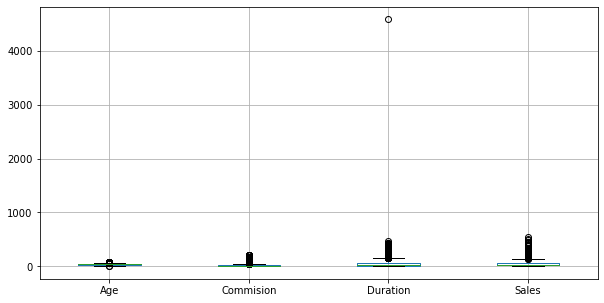

In [211]:
plt.figure(figsize= (10,5))
df_num.boxplot()

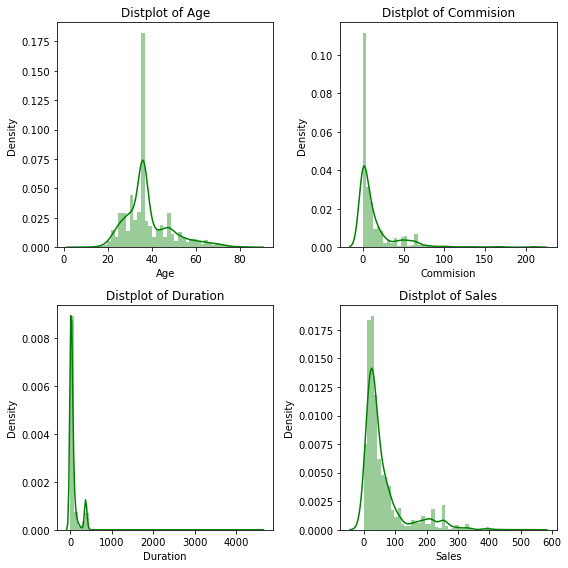

In [213]:
plt.figure(figsize=(8,8))
dist = df_num.columns
for i in range(len(dist)):
    plt.subplot(2,2,i+1)
    sns.distplot(df_num[dist[i]],kde = True,color = 'g')
    plt.title('Distplot of {}'.format(dist[i]))
    plt.tight_layout()

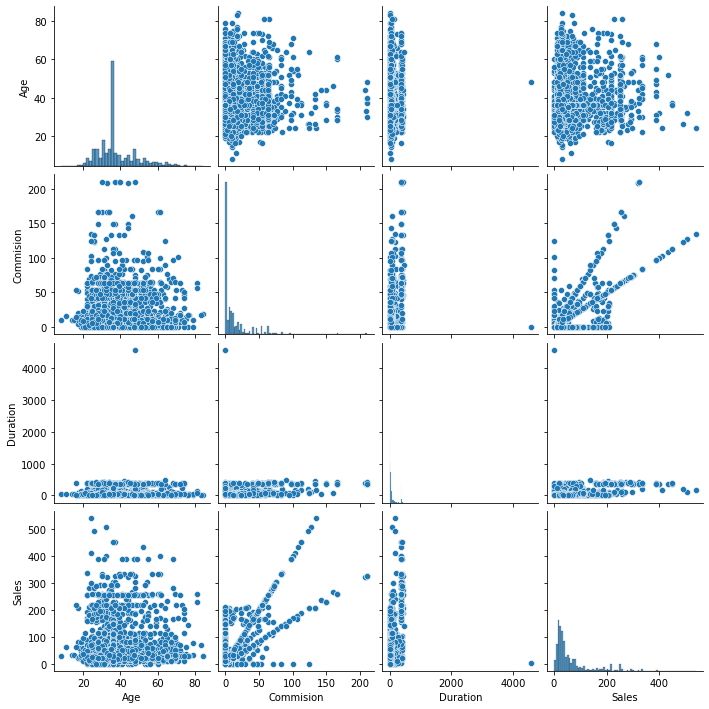

In [214]:
sns.pairplot(df_num)

In [215]:
corr = df_num.corr()

<AxesSubplot:>

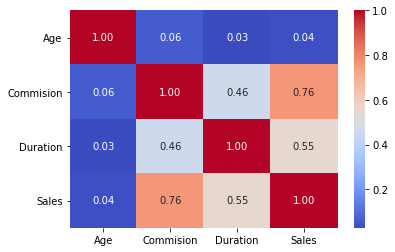

In [216]:
sns.heatmap(corr,annot = True,fmt = '0.02f',cmap = 'coolwarm')

# High correlation:
    1.Commision vs sales
    2.commision vs Duration
    3.Duration vs sales

# Outliers Treatment

In [217]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [218]:
feature_list = df_num.columns

In [219]:
for i in feature_list:
    LL, UL = remove_outlier(df_num[i])
    df_num[i] = np.where(df_num[i] > UL, UL, df_num[i])
    df_num[i] = np.where(df_num[i] < LL, LL, df_num[i])

<AxesSubplot:>

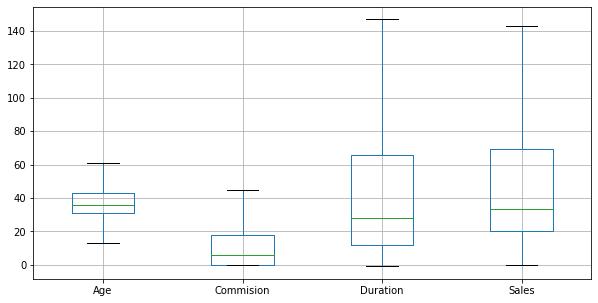

In [220]:
plt.figure(figsize= (10,5))
df_num.boxplot()

# convert the object to  categorical

In [221]:
for feature in insurance_df.columns:
    if insurance_df[feature].dtype == 'object':
        insurance_df[feature] = pd.Categorical(insurance_df[feature]).codes

In [222]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 193.1 KB


# Convereted Dataset Column 

In [223]:
def value(col,nbins):
    print('\n\nvalue counts of ',col)
    print('-----------------------')
    print(insurance_df[col].value_counts(),end = ' ')

In [224]:
lst_num = insurance_df.columns.values
len(lst_num)

10

In [225]:
for i in lst_num:
    value(i,10)



value counts of  Age
-----------------------
36    880
31    124
48    107
30     91
35     91
     ... 
15      1
14      1
11      1
84      1
83      1
Name: Age, Length: 70, dtype: int64 

value counts of  Agency_Code
-----------------------
2    1238
0     913
1     471
3     239
Name: Agency_Code, dtype: int64 

value counts of  Type
-----------------------
1    1709
0    1152
Name: Type, dtype: int64 

value counts of  Claimed
-----------------------
0    1947
1     914
Name: Claimed, dtype: int64 

value counts of  Commision
-----------------------
0.00      1239
23.76       61
54.00       59
63.21       59
7.70        57
          ... 
160.38       1
28.00        1
16.27        1
11.86        1
49.40        1
Name: Commision, Length: 324, dtype: int64 

value counts of  Channel
-----------------------
1    2815
0      46
Name: Channel, dtype: int64 

value counts of  Duration
-----------------------
10     78
6      77
11     77
9      75
8      71
       ..
334     1
278   

In [226]:
value('Claimed',10)



value counts of  Claimed
-----------------------
0    1947
1     914
Name: Claimed, dtype: int64 

In [227]:
insurance_df['Claimed'].value_counts(normalize = True)

0    0.680531
1    0.319469
Name: Claimed, dtype: float64

# Train Test split

In [228]:
x = insurance_df.drop('Claimed',axis = 1)
y = insurance_df.pop('Claimed')

In [229]:
x_train,x_test,train_labels,test_labels = train_test_split(x,y, test_size=0.30,random_state = 0)

In [230]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

x_train (2002, 9)
x_test (859, 9)
train_labels (2002,)
test_labels (859,)


# Building the decission tree model

In [231]:
dt_model =  DecisionTreeClassifier(criterion='gini')

In [232]:
dt_model.fit(x_train,train_labels)

DecisionTreeClassifier()

In [233]:
print(pd.DataFrame(dt_model.feature_importances_,columns = ['Imp'],index = x_train.columns).sort_values('Imp',ascending=False))

                   Imp
Duration      0.243684
Sales         0.239559
Agency_Code   0.191517
Age           0.176130
Commision     0.088319
Product Name  0.026141
Destination   0.023828
Channel       0.007845
Type          0.002976


In [234]:
train_label_char = ['No','Yes']

#open file 
insurance_tree_file = open('D:\insurancetree.dot','w')
#dot_data
dot_data = tree.export_graphviz(dt_model,
                                out_file = insurance_tree_file,
                                feature_names = list(x_train),
                                class_names = list(train_label_char)
                               )

#close file 
insurance_tree_file.close()

Trees are overgrown some purning technique need to apply 

In [235]:
param_grid1 ={
    'max_depth':[5,10,20,30,50],
    'min_samples_leaf':[50,100,150],
    'min_samples_split':[150,300,450]
}

dt_model = DecisionTreeClassifier(random_state = 5)

grid_search1 = GridSearchCV(estimator = dt_model,
                          param_grid = param_grid1,
                          cv = 3)

In [236]:
grid_search1.fit(x_train,train_labels)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=5),
             param_grid={'max_depth': [5, 10, 20, 30, 50],
                         'min_samples_leaf': [50, 100, 150],
                         'min_samples_split': [150, 300, 450]})

In [237]:
grid_search1.best_params_

{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 150}

In [238]:
best_grid1 = grid_search1.best_estimator_

In [239]:
ytrain_predict1 = best_grid1.predict(x_train)
ytest_predict1 = best_grid1.predict(x_test)

In [240]:
confusion_matrix(train_labels,ytrain_predict1)

array([[1186,  192],
       [ 244,  380]], dtype=int64)

In [241]:
confusion_matrix(test_labels,ytest_predict1)

array([[476,  93],
       [126, 164]], dtype=int64)

In [242]:
print(classification_report(train_labels,ytrain_predict1))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1378
           1       0.66      0.61      0.64       624

    accuracy                           0.78      2002
   macro avg       0.75      0.73      0.74      2002
weighted avg       0.78      0.78      0.78      2002



In [243]:
print(classification_report(test_labels,ytest_predict1))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       569
           1       0.64      0.57      0.60       290

    accuracy                           0.75       859
   macro avg       0.71      0.70      0.71       859
weighted avg       0.74      0.75      0.74       859



# CART model

In [244]:
cart =classification_report(train_labels, ytrain_predict1,output_dict=True)
df1=pd.DataFrame(cart).transpose()
train_precision1=round(df1.loc["1"][0],2)
train_recall1=round(df1.loc["1"][1],2)
train_f11=round(df1.loc["1"][2],2)
print ('cart model train precision ',train_precision1)
print ('cart model train recall ',train_recall1)
print ('cart model train f1 ',train_f11)

cart model train precision  0.66
cart model train recall  0.61
cart model train f1  0.64


In [245]:
cart1 =classification_report(test_labels, ytest_predict1,output_dict=True)
df2=pd.DataFrame(cart1).transpose()
test_precision1=round(df2.loc["1"][0],2)
test_recall1=round(df2.loc["1"][1],2)
test_f11=round(df2.loc["1"][2],2)
print ('cart model test precision ',test_precision1)
print ('cart model test recall ',test_recall1)
print ('cart model test f1 ',test_f11)

cart model test precision  0.64
cart model test recall  0.57
cart model test f1  0.6


# AUC and ROC for the training data

AUC: 0.823


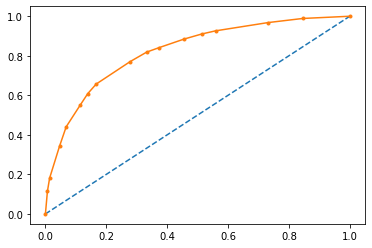

In [246]:
# predict probabilities
probs = grid_search1.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
CART_tr_fpr, CART_tr_tpr, CART_tr_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(CART_tr_fpr, CART_tr_tpr, marker='.')
# show the plot
plt.show()

# AUC and ROC for the test data

AUC: 0.777


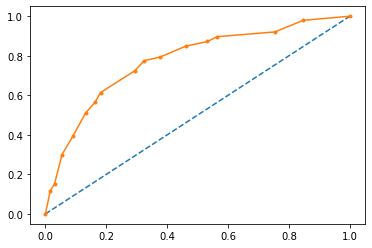

In [247]:
# predict probabilities
probs = grid_search1.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
CART_te_fpr, CART_te_tpr, CART_te_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(CART_te_fpr, CART_te_tpr, marker='.')
# show the plot
plt.show()

# RandomForestClassifier

In [248]:
param_grid2 = {
    'max_depth':[5,10,20,30],
    'max_features':[2,3,4],
    'min_samples_leaf':[50,100,150],
    'min_samples_split':[150,300,450],
    'n_estimators':[101,301]
}

rfcl = RandomForestClassifier(random_state = 0)

grid_search2 = GridSearchCV(estimator = rfcl,
                          param_grid = param_grid2,
                          cv = 3
                          )

In [249]:
grid_search2.fit(x_train,train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 10, 20, 30],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [50, 100, 150],
                         'min_samples_split': [150, 300, 450],
                         'n_estimators': [101, 301]})

In [250]:
grid_search2.best_params_

{'max_depth': 5,
 'max_features': 2,
 'min_samples_leaf': 50,
 'min_samples_split': 150,
 'n_estimators': 101}

In [251]:
best_grid2 = grid_search2.best_estimator_

In [252]:
ytrain_predict2 = best_grid2.predict(x_train)
ytest_predict2 = best_grid2.predict(x_test)

In [253]:
confusion_matrix(train_labels,ytrain_predict2)

array([[1228,  150],
       [ 310,  314]], dtype=int64)

In [254]:
confusion_matrix(test_labels,ytest_predict2)

array([[505,  64],
       [147, 143]], dtype=int64)

In [255]:
print(classification_report(train_labels,ytrain_predict2))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1378
           1       0.68      0.50      0.58       624

    accuracy                           0.77      2002
   macro avg       0.74      0.70      0.71      2002
weighted avg       0.76      0.77      0.76      2002



In [256]:
print(classification_report(test_labels,ytest_predict2))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       569
           1       0.69      0.49      0.58       290

    accuracy                           0.75       859
   macro avg       0.73      0.69      0.70       859
weighted avg       0.75      0.75      0.74       859



# Random Forest Model

In [257]:
rf =classification_report(train_labels, ytrain_predict2,output_dict=True)
df3=pd.DataFrame(rf).transpose()
train_precision2=round(df3.loc["1"][0],2)
train_recall2=round(df3.loc["1"][1],2)
train_f12=round(df3.loc["1"][2],2)
print ('rf model train precision ',train_precision2)
print ('rf model train recall ',train_recall2)
print ('rf model train f1 ',train_f12)

rf model train precision  0.68
rf model train recall  0.5
rf model train f1  0.58


In [258]:
rf1 =classification_report(test_labels, ytest_predict2,output_dict=True)
df4=pd.DataFrame(rf1).transpose()
test_precision2=round(df4.loc["1"][0],2)
test_recall2=round(df4.loc["1"][1],2)
test_f12=round(df4.loc["1"][2],2)
print ('rf model test precision ',test_precision2)
print ('rf model test recall ',test_recall2)
print ('rf model test f1 ',test_f12)

rf model test precision  0.69
rf model test recall  0.49
rf model test f1  0.58


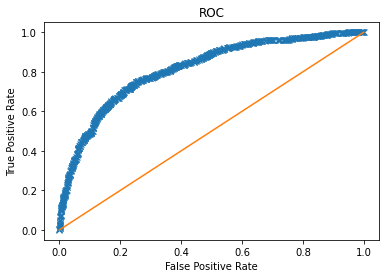

Area under Curve is 0.8147439386327266


In [125]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_tr_fpr, rf_tr_tpr,_=roc_curve(train_labels,best_grid2.predict_proba(x_train)[:,1])
plt.plot(rf_tr_fpr,rf_tr_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(train_labels,best_grid2.predict_proba(x_train)[:,1]))

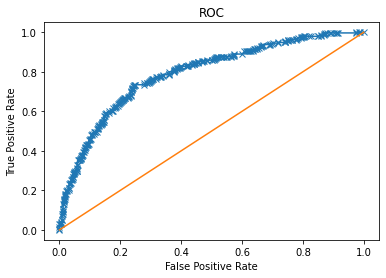

Area under Curve is 0.7920732076843828


In [126]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_te_fpr, rf_te_tpr,_=roc_curve(test_labels,best_grid2.predict_proba(x_test)[:,1])
plt.plot(rf_te_fpr,rf_te_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(test_labels,best_grid2.predict_proba(x_test)[:,1]))

# MLPClassifier - ANN

In [127]:
sc = StandardScaler()

In [128]:
x_train = sc.fit_transform(x_train)

In [129]:
x_test = sc.transform(x_test)

In [130]:
param_grid3 = {
    'hidden_layer_sizes':[(100,100,100)],
    'activation':['logistic','relu'],
    'solver':['sgd','adam'],
    'tol':[0.1,0.01],
    'max_iter':[10000]
}

clf = MLPClassifier(random_state = 0)

grid_search3 = GridSearchCV(estimator = clf,param_grid = param_grid3 ,cv = 3)

In [131]:
grid_search3.fit(x_train,train_labels)

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=0),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(100, 100, 100)],
                         'max_iter': [10000], 'solver': ['sgd', 'adam'],
                         'tol': [0.1, 0.01]})

In [132]:
grid_search3.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100, 100, 100),
 'max_iter': 10000,
 'solver': 'adam',
 'tol': 0.01}

In [133]:
best_grid3 = grid_search3.best_estimator_

In [134]:
ytrain_predict3 = best_grid3.predict(x_train)
ytest_predict3 = best_grid3.predict(x_test)

In [135]:
confusion_matrix(train_labels,ytrain_predict3)

array([[1281,   97],
       [ 361,  263]], dtype=int64)

In [136]:
confusion_matrix(test_labels,ytest_predict3)

array([[529,  40],
       [177, 113]], dtype=int64)

In [137]:
print(classification_report(train_labels,ytrain_predict3))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85      1378
           1       0.73      0.42      0.53       624

    accuracy                           0.77      2002
   macro avg       0.76      0.68      0.69      2002
weighted avg       0.76      0.77      0.75      2002



In [138]:
print(classification_report(test_labels,ytest_predict3))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       569
           1       0.74      0.39      0.51       290

    accuracy                           0.75       859
   macro avg       0.74      0.66      0.67       859
weighted avg       0.75      0.75      0.72       859



# ANN

In [139]:
ann =classification_report(train_labels, ytrain_predict3,output_dict=True)
df5=pd.DataFrame(ann).transpose()
train_precision3=round(df5.loc["1"][0],2)
train_recall3=round(df5.loc["1"][1],2)
train_f13=round(df5.loc["1"][2],2)
print ('ANN model train precision ',train_precision3)
print ('ANN model train recall ',train_recall3)
print ('ANN model train f1 ',train_f13)

ANN model train precision  0.73
ANN model train recall  0.42
ANN model train f1  0.53


In [141]:
ann1 =classification_report(test_labels, ytest_predict3,output_dict=True)
df6=pd.DataFrame(ann1).transpose()
test_precision3=round(df6.loc["1"][0],2)
test_recall3=round(df6.loc["1"][1],2)
test_f13=round(df6.loc["1"][2],2)
print ('ANN model test precision ',test_precision3)
print ('ANN model test recall ',test_recall3)
print ('ANN model test f1 ',test_f13)

ANN model test precision  0.74
ANN model test recall  0.39
ANN model test f1  0.51


# AUC and ROC for the training data

AUC: 0.813


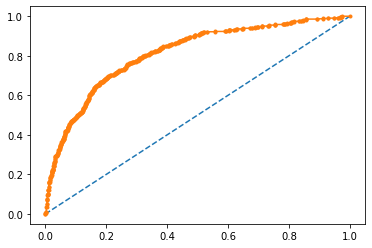

In [143]:
# predict probabilities
probs = grid_search3.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
ANN_tr_fpr,ANN_tr_tpr, ANN_tr_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ANN_tr_fpr, ANN_tr_tpr, marker='.')
# show the plot
plt.show()

AUC: 0.793


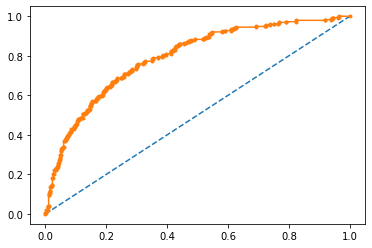

In [144]:
# AUC and ROC for the test data

# predict probabilities
probs = grid_search3.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
ANN_te_fpr, ANN_te_tpr, ANN_te_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ANN_te_fpr, ANN_te_tpr, marker='.')
# show the plot
plt.show()

# ROC Curve for all Training data models 

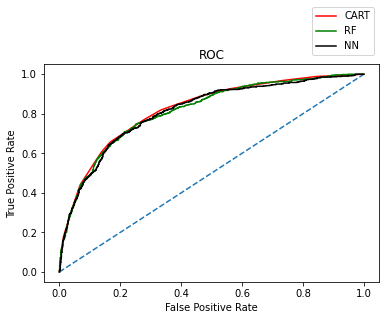

In [145]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(CART_tr_fpr, CART_tr_tpr,color='red',label="CART")
plt.plot(rf_tr_fpr,rf_tr_tpr,color='green',label="RF")
plt.plot(ANN_tr_fpr,ANN_tr_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

# ROC Curve for all the Test data models

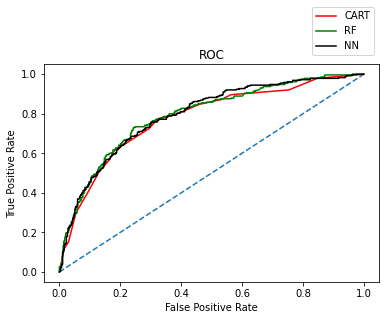

In [146]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(CART_te_fpr, CART_te_tpr,color='red',label="CART")
plt.plot(rf_te_fpr,rf_te_tpr,color='green',label="RF")
plt.plot(ANN_te_fpr,ANN_te_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

Model Selection:

All the three models are gives the similar output but I choose Random Forest model.

Random Forest is less prone to over fitting. Over fitting will happen to flexible model like Decision Tree model where the model memorize the training data and learn from the noise as well. So this will make it unable to predict the test data

A Random Forest model can reduce the High variance in the model.

Here we need mode data to make our model work better. And neural network model to make perfect otherwise Random Forest model will better in terms of performance.

Recommendations:

•	In agency code JZI need to train because their sales is very less compare to other agency code. So Focus on new Marketing strategy needed to improve the sales.  

•	Online mode has high frequency in channel columns. So we can see that streamlining in online lead to benefitted customer also increased the profit.

•	And Insurance claimed also online mode has high but offline almost all the channel claimed the insurance.

•	The type of insurance claimed Travel agency has high frequency but compare with sales and in terms of claimed status Airline has highest sales as well as in claimed Status. So need to focus on customer satisfaction and avoid fraudulent transaction at earliest.

